In [38]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

In [39]:
gas1 = ct.Solution('FFCM1_custom.cti')
gas2 = ct.Solution('FFCM1_custom_cheb_test_extra_zeros.cti')
gas3 = ct.Solution('FFCM1_custom_cheb_test_extra_zeros_updated.cti')

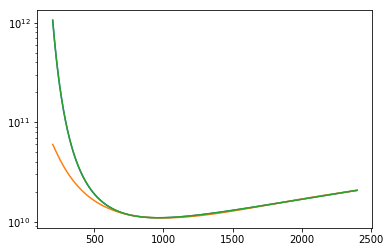

In [40]:
temperature = np.arange(200,2400)
k1 = []
k2 = []
k4= []
for t in temperature:
    gas1.TPX = t,101325,{'Ar':1}
    gas2.TPX = t,101325,{'Ar':1}
    gas3.TPX = t,101325,{'Ar':1}
    k1.append(gas1.forward_rate_constants[3])
    k2.append(gas2.forward_rate_constants[3])
    k4.append(gas3.forward_rate_constants[284])
plt.semilogy(temperature,k1,temperature,k2,temperature,k4)

In [41]:
six_parameter_fit_nominal_parameters_dict = {'H2O2 + OH <=> H2O + HO2':{'A':4.64E-06,'n':5.605491008,'Ea':-5440.266692,'c':126875776.1,'d':0.000441194,'f':-5.35E-13},
                                '2 HO2 <=> H2O2 + O2':{'A':1.30E+04,'n':1.997152351,'Ea':-3628.04407,'c':93390973.44,'d':-0.000732521,'f':8.20E-12} ,
                                 'HO2 + OH <=> H2O + O2':{'A':1.41E+18,'n':-2.05344973,'Ea':-232.0064051,'c':15243859.12,'d':-0.001187694,'f':8.01E-12},
                                 '2 OH <=> H2O + O':{'A':354.5770856,'n':2.938741717,'Ea':-1836.492972,'c':12010735.18,'d':-4.87E-05,'f':1.22E-12},
                                 'CH3 + HO2 <=> CH4 + O2':{'A':3.19e3,'n':2.670857,'Ea':-4080.73,'c':0.0,'d':0.0,'f':0.0},
                                 'CH3 + HO2 <=> CH3O + OH':{'A':8.38e11,'n':.29,'Ea':-785.45,'c':0.0,'d':0.0,'f':0.0}}

In [42]:
def calculate_six_parameter_fit(reaction,dictonary,temperature):
    #finish editing this 
    #calc Ea,c,d,F seprately 
    A = dictonary[reaction]['A']
    n = dictonary[reaction]['n']
    Ea_temp = dictonary[reaction]['Ea']/(1.987*temperature)
    c_temp = dictonary[reaction]['c']/((1.987*temperature)**3)
    d_temp = dictonary[reaction]['d']*(1.987*temperature)
    f_temp = dictonary[reaction]['f']* ((1.987*temperature)**3)
            

    k = A*(temperature**n)*np.exp(-Ea_temp-c_temp-d_temp-f_temp)
    return k 

def calculate_list_of_k(T_initial,T_final,reaction,dictonary):
    temperature = np.arange(T_initial,T_final)
    k_list = []
    for temp in temperature:
        k_list.append(calculate_six_parameter_fit(reaction,dictonary,temp))
    return temperature,k_list

In [43]:
temperature,k3 = calculate_list_of_k(200,2400,'HO2 + OH <=> H2O + O2',six_parameter_fit_nominal_parameters_dict)

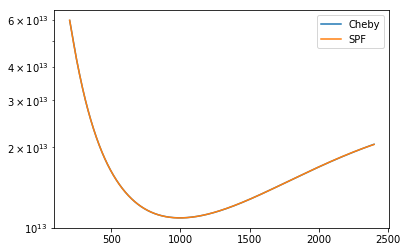

In [44]:
#plt.semilogy(temperature,np.array(k1)*1000,label = 'CTI Arr')
plt.semilogy(temperature,np.array(k2)*1000,label = 'Cheby')
plt.semilogy(temperature,k3,label='SPF')
plt.legend()

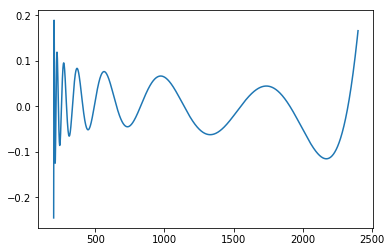

In [45]:
k2 = np.array(k2)*1000
k3 = np.array(k3)
difference = ((k2-k3)/k2 )*100
plt.plot(temperature,difference)

In [46]:
temperature_list = list(temperature)
temperature_list.index(308)

108

In [47]:
print(k2[108])
print(k3[108])
print(k4[108])

30865101414592.652
30884364698376.062
81796137406.71268


In [48]:
print(gas2.reaction(3).coeffs)
#gas3.reaction(284).coeffs

[[ 1.04095e+01  0.00000e+00]
 [-3.47767e-01  0.00000e+00]
 [ 7.43022e-02  0.00000e+00]
 [ 8.72900e-02  0.00000e+00]
 [ 4.99232e-02  0.00000e+00]
 [ 2.53723e-02  0.00000e+00]
 [ 1.13943e-02  0.00000e+00]
 [ 4.37814e-03  0.00000e+00]
 [ 1.03394e-03  0.00000e+00]
 [-1.97886e-04  0.00000e+00]
 [-7.21640e-04  0.00000e+00]
 [-5.88176e-04  0.00000e+00]
 [-6.64683e-04  0.00000e+00]
 [-2.23826e-04  0.00000e+00]
 [-5.75356e-04  0.00000e+00]]


In [49]:
1.34094640e+01-3

10.409464